In [2]:
import MDAnalysis as mda
import MDAnalysis.analysis.pca as pca
from MDAnalysis.analysis import align
import numpy as np

/home/sl206/.conda/envs/mdanalysis/lib/python3.10/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [31]:
# Select backbone atoms
selection = "name CA"

n_components = 10  # Use top 10 eigenvectors
frame_step = 20  # Analyze every 20 frames

rmsip_values = []

for r in range(1,17):
    print(f"This is run {r}")
    # Load the trajectory
    direc = f"1r69-ar{r}"
    native = f"{direc}/native.pdb"
    movie = f"{direc}/movie.dcd"
    u = mda.Universe(native, movie)  # Use "native.pdb" if needed
    
    atoms = u.select_atoms(selection)
    
    rmsip_data = []
    
    import MDAnalysis as mda
    import numpy as np
        
    eigenvectors_list = []
    
    # Split the trajectory into segments
    for ts in range(2, len(u.trajectory), frame_step):
        start = 2
        half = int(min((start + ts + frame_step)/2, len(u.trajectory)))
        end = int(min(ts + frame_step, len(u.trajectory)))
    
        # Collect atomic positions for this segment
        first_half_coordinates = [atoms.positions.copy() for ts in u.trajectory[start:half]]
        second_half_coordinates = [atoms.positions.copy() for ts in u.trajectory[half:end]]
        
        # Convert to NumPy array
        first_half_coordinates = np.array(first_half_coordinates)
        second_half_coordinates = np.array(second_half_coordinates)
    
        # Create a new Universe for this segment
        first_half_u = mda.Merge(atoms)  # Clone atom selection
        first_half_u.load_new(first_half_coordinates, format="memory")  # Load coordinates
        
        # Run PCA on this segment
        first_half_pca_analysis = pca.PCA(first_half_u, select=selection).run()
    
        # Store top 10 eigenvectors (each column is an eigenvector)
        first_half_eigenvectors = first_half_pca_analysis.p_components[:, :n_components]
        
        second_half_u = mda.Merge(atoms)
        second_half_u.load_new(second_half_coordinates, format="memory")

        second_half_pca_analysis = pca.PCA(second_half_u, select=selection).run()
        
        second_half_eigenvectors = second_half_pca_analysis.p_components[:, :n_components]

        rmsip = np.sqrt(np.sum(np.dot(first_half_eigenvectors.T, second_half_eigenvectors) ** 2) / n_components)
        print(f"start: {start}, halfway: {half}, end: {end}")
        print(rmsip)
        rmsip_data.append(rmsip)
    rmsip_values.append(rmsip_data)

This is run 1
start: 2, halfway: 12, end: 22
0.6629617443302741
start: 2, halfway: 22, end: 42
0.7670032283098623


/home/sl206/.conda/envs/mdanalysis/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/sl206/.conda/envs/mdanalysis/lib/python3.10/site-packages/MDAnalysis/analysis/pca.py:330: DeprecationWarning: The `p_components` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.p_components` instead.
  warnings.warn(wmsg, DeprecationWarning)


start: 2, halfway: 32, end: 62
0.8295297191109259
start: 2, halfway: 42, end: 82
0.8799397099852583
start: 2, halfway: 52, end: 102
0.8826366360202155
start: 2, halfway: 62, end: 122
0.9182758481813713
start: 2, halfway: 72, end: 142
0.9181976971993009
start: 2, halfway: 82, end: 162
0.9350583303392521
start: 2, halfway: 92, end: 182
0.9372387358376324
start: 2, halfway: 102, end: 202
0.9396390060668451
start: 2, halfway: 112, end: 222
0.943744420440606
start: 2, halfway: 122, end: 242
0.9406889708261476
start: 2, halfway: 132, end: 262
0.9422301589357132
start: 2, halfway: 142, end: 282
0.9542078332856756
start: 2, halfway: 152, end: 302
0.9482366297352111
start: 2, halfway: 162, end: 322
0.952057380354076
start: 2, halfway: 172, end: 342
0.9621273215181895
start: 2, halfway: 182, end: 362
0.9627746058175053
start: 2, halfway: 192, end: 382
0.9718434158917298
start: 2, halfway: 202, end: 402
0.971660896255061
This is run 2
start: 2, halfway: 12, end: 22
0.6007349373648576
start: 2, ha

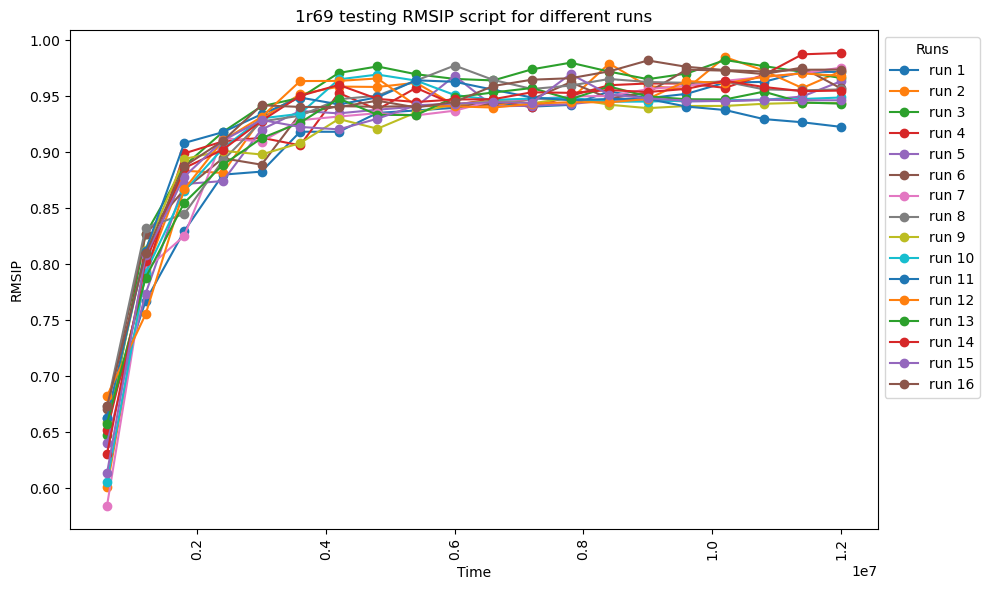

In [32]:
import matplotlib.pyplot as plt

time = 0
times = []
for i in range(1,21):
    time += 12000000/20
    times.append(time)

plt.figure(figsize=(10, 6))

# Plot each run
r = 0
for rmsip_data in rmsip_values:
    r += 1
    plt.plot(times, rmsip_data, label=f"run {r}", marker='o')

# Customize the plot
plt.title('1r69 testing RMSIP script for different runs')
plt.xlabel('Time')
plt.ylabel('RMSIP')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Runs', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

plt.savefig("1r69_rmsip.jpg", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [19]:
for ts in range(2, len(u.trajectory), frame_step):
    start = 2
    half = min((start + ts + frame_step)/2, len(u.trajectory))
    end = min(ts + frame_step, len(u.trajectory))
    print(start, half, end)

2 12.0 22
2 22.0 42
2 32.0 62
2 42.0 82
2 52.0 102
2 62.0 122
2 72.0 142
2 82.0 162
2 92.0 182
2 102.0 202
2 112.0 222
2 122.0 242
2 132.0 262
2 142.0 282
2 152.0 302
2 162.0 322
2 172.0 342
2 182.0 362
2 192.0 382
2 202.0 402


In [33]:
import csv

# Specify the file name
filename = "rmsips.csv"

# Open the file in write mode
with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the list of lists to the CSV file
    writer.writerows(rmsip_values)

print(f"Data has been written to {filename}")

Data has been written to rmsips.csv


In [34]:
import csv

# Specify the file name
filename = "rmsips.csv"

# Read the CSV file into a list of lists
with open(filename, mode='r', newline='') as file:
    reader = csv.reader(file)
    data = [row for row in reader]  # Convert each row into a list

In [42]:
# Check if they are equal
for i in range(len(rmsip_values)):
    for j in range(len(rmsip_values[0])):
        print(rmsip_values[i][j], data[i][j])

0.6629617443302741 0.6629617443302741
0.7670032283098623 0.7670032283098623
0.8295297191109259 0.8295297191109259
0.8799397099852583 0.8799397099852583
0.8826366360202155 0.8826366360202155
0.9182758481813713 0.9182758481813713
0.9181976971993009 0.9181976971993009
0.9350583303392521 0.9350583303392521
0.9372387358376324 0.9372387358376324
0.9396390060668451 0.9396390060668451
0.943744420440606 0.943744420440606
0.9406889708261476 0.9406889708261476
0.9422301589357132 0.9422301589357132
0.9542078332856756 0.9542078332856756
0.9482366297352111 0.9482366297352111
0.952057380354076 0.952057380354076
0.9621273215181895 0.9621273215181895
0.9627746058175053 0.9627746058175053
0.9718434158917298 0.9718434158917298
0.971660896255061 0.971660896255061
0.6007349373648576 0.6007349373648576
0.7927750304653425 0.7927750304653425
0.8833933256021348 0.8833933256021348
0.881476242296358 0.881476242296358
0.930317960080968 0.930317960080968
0.9516605145522684 0.9516605145522684
0.9585909063877535 0.9